In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
import pandas as pd
new_file=pd.read_csv('C:\\Users\\1\\Desktop\\train.csv')

In [3]:
from datetime import datetime as dt
new_file['pickup_datetime']=pd.to_datetime(new_file['pickup_datetime'])    

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
del new_file['dropoff_datetime']

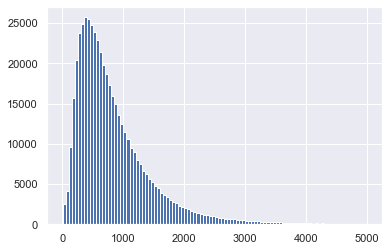

In [5]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plb

plt.hist(new_file['trip_duration'], 100, (1,5000))
plt.show()

In [6]:
new_file['log_trip_duration'] = [(np.log1p(i)) for i in new_file['trip_duration']]

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


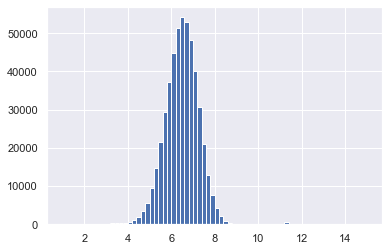

In [7]:
plt.hist(new_file['log_trip_duration'], 70, (1,15))
plt.show()

In [8]:
ltd=new_file['log_trip_duration']
sum_sq=(((ltd-ltd.mean())**2).sum()/len(new_file))**(1/2)
sum_sq


0.7954050630008528

In [9]:
from datetime import datetime as dt

new_file['month'] = new_file['pickup_datetime'].dt.month
new_file['weekday'] = new_file['pickup_datetime'].dt.weekday
new_file['hour'] = new_file['pickup_datetime'].dt.hour
new_file['day'] = new_file['pickup_datetime'].dt.day

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

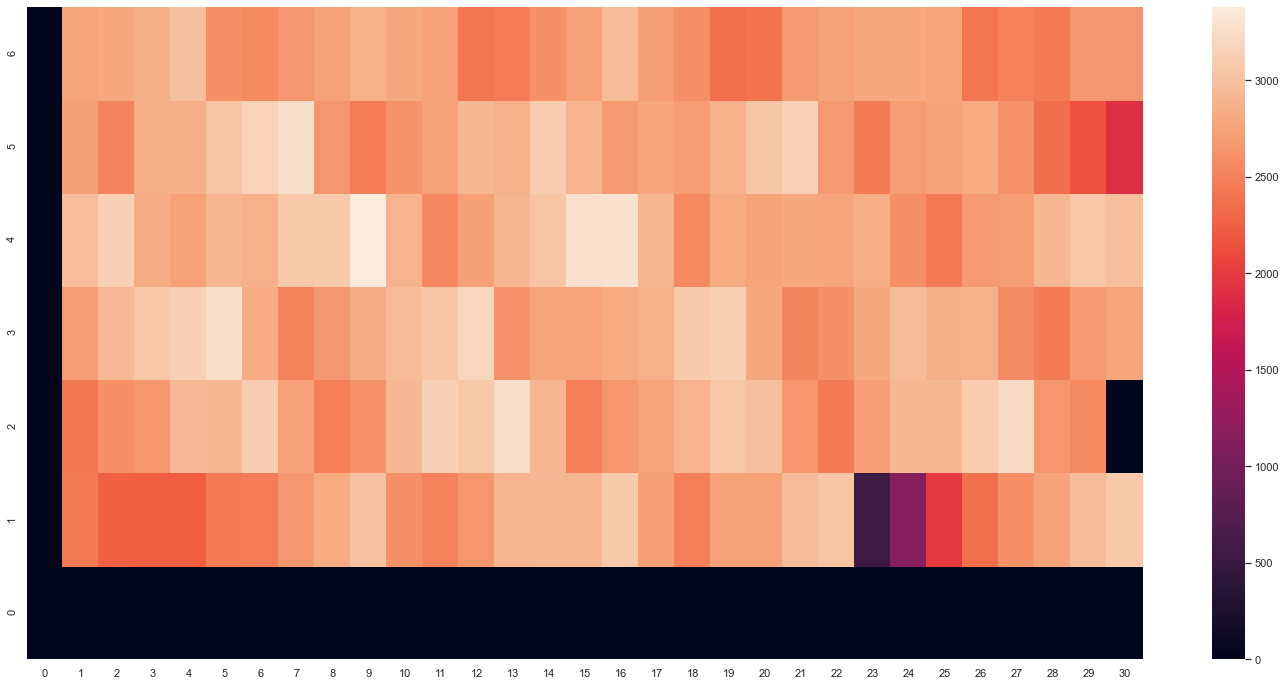

In [10]:
quant = np.empty((7, 31))
for i in range(7): 
    for l in range(31): 
        msk = (new_file.loc[:, 'day'] == l) & (new_file.loc[:, 'month'] == i)
        s = msk.sum()
        quant[i, l] = s
plt.figure(figsize=(25, 12))
sns.heatmap(quant).invert_yaxis()
plt.show()

In [11]:
from datetime import datetime as dt
new_file['counter'] = np.ones(len(new_file))

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


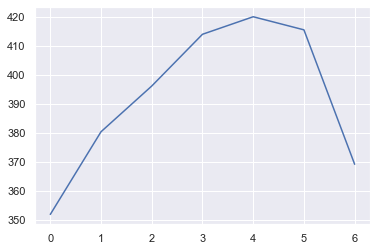

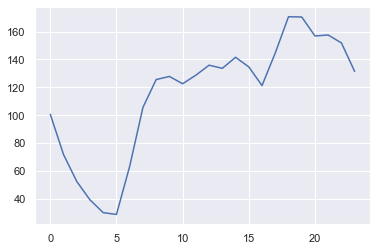

In [12]:
ndays_2 =len(np.unique(new_file['pickup_datetime'].dt.date)) 
plt.plot(new_file.groupby(['weekday']).counter.sum()/ ndays_2) 
plt.show()

ndays_3 =len(np.unique(new_file['pickup_datetime'].dt.date)) 
plt.plot(new_file.groupby(['hour']).counter.sum()/ ndays_3) 
plt.show()


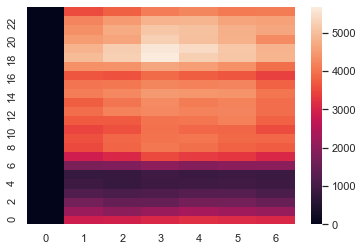

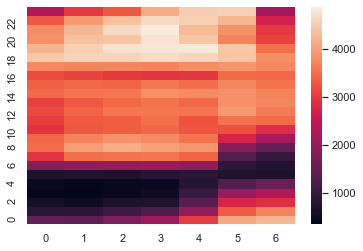

In [13]:
ndays_3 =len(np.unique(new_file['pickup_datetime'].dt.date)) 
h_m= np.empty((24, 7))
for i in range(24): 
    for l in range(7): 
        msk = (new_file.loc[:, 'hour'] == i) & (new_file.loc[:, 'month'] == l)
        s = msk.sum()
        h_m[i, l] = s     
sns.heatmap(h_m).invert_yaxis()
plt.show()          
    
h_wd = np.empty((24, 7))
for i in range(24): 
    for l in range(7): 
        msk = (new_file.loc[:, 'hour'] == i) & (new_file.loc[:, 'weekday'] == l)
        s = msk.sum()
        h_wd[i, l] = s 
sns.heatmap(h_wd).invert_yaxis()
plt.show()



In [14]:
anomalous=[]
date=new_file['pickup_datetime'].dt.date
date_lst=[str(i) for i in date ]
for i in date_lst:
    if i == '2016-01-24' or i == '2016-01-23':
        anomalous.append(True)
    else:
        anomalous.append(False)
new_file['anomalous']=anomalous

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [15]:
del new_file['counter']

In [16]:
mask = np.random.rand(len(new_file)) < 0.7

In [17]:
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

categ_features=['anomalous']
numeric_features = ['month','weekday','hour','day','passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categ_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(new_file.loc[mask], new_file.loc[mask,'log_trip_duration'])
y_pred = model.predict(new_file.loc[~mask])

print("Test RMSLE = %.4f" % ((mean_squared_error(new_file.loc[~mask,'log_trip_duration'], \
                                                 y_pred)))**(1/2))

Test RMSLE = 0.7980


In [18]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [19]:
def circles_map(data, latitude_column, longitude_column, color):
    
    center = (new_file[latitude_column].mean(),new_file[longitude_column].mean())
    res_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)
    
    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    c_layer = LayerGroup(layers=circles)
    res_map.add_layer(c_layer)

    return res_map

In [20]:
circles_map(new_file.sample(1000), "pickup_latitude", "pickup_longitude", "purple")

Map(center=[40.75098573277737, -73.97351160830516], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [21]:
circles_map(new_file.sample(1000), "dropoff_latitude", "dropoff_longitude", "purple")

Map(center=[40.75183195669375, -73.97337555582763], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [22]:
from haversine import haversine
pickuplt=new_file.pickup_latitude.tolist()
pickuplg=new_file.pickup_longitude.tolist()
dropofft=new_file.dropoff_latitude.tolist()
dropoffg=new_file.dropoff_longitude.tolist()

for_haversine_p=list(zip(pickuplt,pickuplg))
for_haversine_d=list(zip(dropofft,dropoffg))
haversine=list(map(lambda x,y: haversine(x,y),for_haversine_p,for_haversine_d))
new_file['haversine']=haversine

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
log_haversine=[np.log1p(i) for i in haversine]
new_file['log_haversine']=log_haversine

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
import scipy.stats
with_log = scipy.stats.pearsonr(new_file['log_haversine'],new_file['log_trip_duration'])[0]
witht_log = scipy.stats.pearsonr(new_file['haversine'],new_file['log_trip_duration'])[0]
print(with_log)
print(witht_log)

0.7495298903968959
0.5543128649556127


In [25]:
mean_velocity=new_file['haversine']/(new_file['trip_duration'])

count    500001.000000
mean          0.004008
std           0.003682
min           0.000000
25%           0.002534
50%           0.003554
75%           0.004963
max           1.566806
dtype: float64

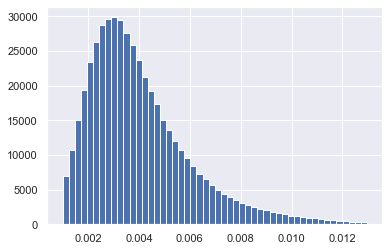

In [26]:
plt.hist(mean_velocity,50, (0.001,12.960528e-03))
mean_velocity.describe()

In [27]:
new_file['mean_velocity']=mean_velocity

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


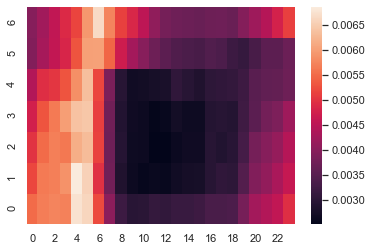

In [28]:
m_speed = np.empty((7, 24)) 
for wd in range(7):
    for h in range(24): 
        mk = (new_file.loc[:, 'weekday'] == wd) & (new_file.loc[:, 'hour'] == h)
        s = new_file.loc[mk, 'haversine'] / new_file.loc[mk, 'trip_duration']
        m_speed[wd, h] = np.median(s)
sns.heatmap(m_speed).invert_yaxis()

In [29]:
del new_file['mean_velocity']

In [30]:
new_file['with_traffic_jams'] = m_speed[new_file.weekday, new_file.hour] < 0.0035

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
lim_Kennedy=[40.64,40.65,-73.79,-73.78]
lim_Guardia=[40.76,40.78,-73.88,-73.87]

In [32]:
new_file['from_Kennedy'] = (new_file.pickup_latitude  > lim_Kennedy[0]) & \
                           (new_file.pickup_latitude  < lim_Kennedy[1]) & \
                           (new_file.pickup_longitude > lim_Kennedy[2]) & \
                           (new_file.pickup_longitude < lim_Kennedy[3])

new_file['to_Kennedy'] = (new_file.dropoff_latitude  > lim_Kennedy[0]) & \
                         (new_file.dropoff_latitude  < lim_Kennedy[1]) & \
                         (new_file.dropoff_longitude > lim_Kennedy[2]) & \
                         (new_file.dropoff_longitude < lim_Kennedy[3])

new_file['from_Guardia'] = (new_file.pickup_latitude  > lim_Guardia[0]) & \
                           (new_file.pickup_latitude  < lim_Guardia[1]) & \
                           (new_file.pickup_longitude > lim_Guardia[2]) & \
                           (new_file.pickup_longitude < lim_Guardia[3])

new_file['to_Guardia'] = (new_file.dropoff_latitude  > lim_Guardia[0]) & \
                         (new_file.dropoff_latitude  < lim_Guardia[1]) & \
                         (new_file.dropoff_longitude > lim_Guardia[2]) & \
                         (new_file.dropoff_longitude < lim_Guardia[3])

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [33]:

new_file['for_haversine_p']=for_haversine_p
new_file['for_haversine_d']=for_haversine_d

lim_Kennedy=[40.64,40.65,-73.79,-73.78]
lim_Guardia=[40.76,40.78,-73.88,-73.87]


pk=[]
for i,l in new_file['for_haversine_p']:
    if lim_Kennedy[0]<=i <=lim_Kennedy[1]  and  lim_Kennedy[2]>=l>= lim_Kennedy[3]:
        pk.append(True) 
    else:
        pk.append(False) 

dk=[]
for i,l in new_file['for_haversine_d']:
    if lim_Kennedy[0]<=i <=lim_Kennedy[1]  and  lim_Kennedy[2]>=l>= lim_Kennedy[3]:
        dk.append(True) 
    else:
        dk.append(False) 


pg=[]
for i,l in new_file['for_haversine_p']:
    if lim_Guardia[0]<=i <=lim_Guardia[1]  and  lim_Guardia[2]>=l>= lim_Guardia[3]:
        pg.append(True) 
    else:
        pg.append(False) 

dg=[]
for i,l in new_file['for_haversine_d']:
    if lim_Guardia[0]<=i <=lim_Guardia[1]  and  lim_Guardia[2]>=l>= lim_Guardia[3]:
        dg.append(True) 
    else:
        dg.append(False) 
        
        
new_file['from_Kennedy']=pk
new_file['to_Kennedy']=dk
new_file['from_Guardia']=pg
new_file['to_Guardia']=dg

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [34]:
del new_file['for_haversine_p']
del new_file['for_haversine_d']

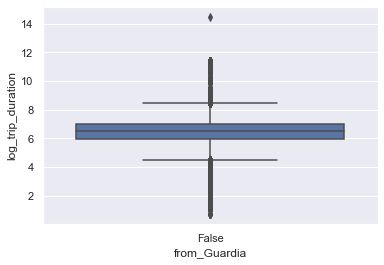

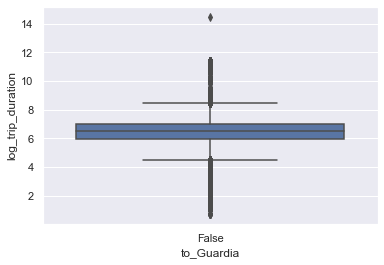

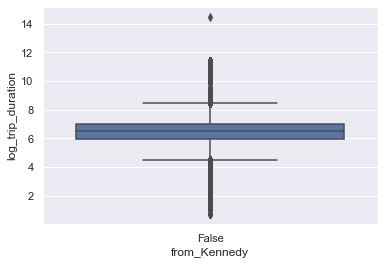

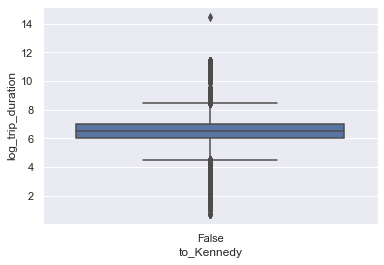

In [35]:
sns.boxplot(x=new_file.from_Guardia, y=new_file.log_trip_duration) 
plt.show()
sns.boxplot(x=new_file.to_Guardia, y=new_file.log_trip_duration) 
plt.show()
sns.boxplot(x=new_file.from_Kennedy, y=new_file.log_trip_duration) 
plt.show()
sns.boxplot(x=new_file.to_Kennedy, y=new_file.log_trip_duration) 
plt.show()

In [36]:
class MapGridTransformer:
    def __init__(self, nrows=4, ncols=3):
        self.nrows = nrows
        self.ncols = ncols
    def fit(self, X, y=None):
        X_ = X.values
        self.b, self.l = np.median(X_, axis=0) - X_.std(axis=0)*1
        self.t, self.r = np.median(X_, axis=0) + X_.std(axis=0)*1
        self.row_h = (self.t - self.b) / self.nrows
        self.col_w = (self.r - self.l) / self.ncols
        return self
    def transform(self, X):
        X_ = X.values
        c = (X_[:, 1] - self.l) // self.col_w
        r = (X_[:, 0] - self.b) // self.row_h
        n = c + r * self.ncols + 1
        n[(X_[:, 1] < self.l) + (X_[:, 1] > self.r) + \
          (X_[:, 0] < self.b) + (X_[:, 0] > self.t)] = 0
        return n.astype(int)
    def fit_transform(self, X ,y=None):
        return self.fit(X).transform(X)
t = MapGridTransformer()
grid_pickup = t.fit_transform(new_file.loc[:, ['pickup_longitude', 'pickup_latitude']])
grid_dropoff = t.fit_transform(new_file.loc[:, ['dropoff_longitude', 'dropoff_latitude']])
new_file['grid_pickup'] = grid_pickup
new_file['grid_dropoff'] = grid_dropoff

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
(new_file.log_haversine != np.log1p(new_file.haversine)).sum()

0

In [38]:
new_file.log_haversine = np.log1p(new_file.haversine)

C:\Users\1\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:

categ_features=['anomalous','with_traffic_jams',
                'from_Kennedy','to_Kennedy','from_Guardia','to_Guardia']
numeric_features = ['grid_pickup','grid_dropoff','log_haversine','month','weekday','hour','day',
                    'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categ_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

#-----------------------------------------------------------------------------------------#

model = pipeline.fit(new_file.loc[mask], new_file.loc[mask,'log_trip_duration'])
y_pred = model.predict(new_file.loc[~mask])
print("Test RMSLE = %.4f" % ((mean_squared_error(new_file.loc[~mask,'log_trip_duration'], \
                                                 y_pred))**(1/2)))

Test RMSLE = 0.5090


In [40]:
print(len(new_file['vendor_id'].unique()))
print(len(new_file['passenger_count'].unique()))
print(len(new_file['store_and_fwd_flag'].unique()))

2
9
2


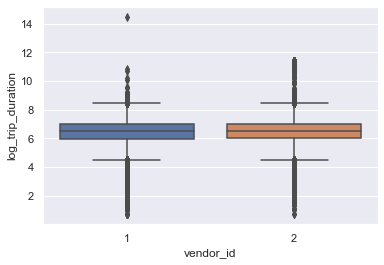

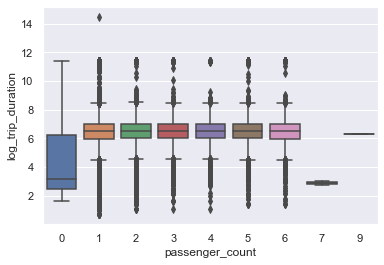

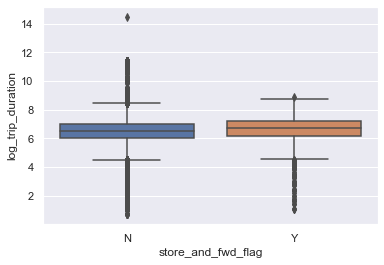

In [41]:
sns.boxplot(x=new_file['vendor_id'], y=new_file.log_trip_duration) 
plt.show()
sns.boxplot(x=new_file['passenger_count'], y=new_file.log_trip_duration) 
plt.show()
sns.boxplot(x=new_file['store_and_fwd_flag'], y=new_file.log_trip_duration) 
plt.show()

In [42]:
new_file.vendor_id -=1
new_file.store_and_fwd_flag = (new_file.store_and_fwd_flag == 'Y').astype(int)

C:\Users\1\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
categ_features=['anomalous','with_traffic_jams','from_Kennedy','to_Kennedy','from_Guardia','to_Guardia']
numeric_features = ['vendor_id','store_and_fwd_flag','month',
                        'weekday','hour','day','passenger_count','log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categ_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(new_file.loc[mask], new_file.loc[mask,'log_trip_duration'])
y_pred = model.predict(new_file.loc[~mask])

print("Test RMSLE = %.4f" % ((mean_squared_error(new_file.loc[~mask,'log_trip_duration'], \
                                                 y_pred)))**(1/2))



Test RMSLE = 0.5090


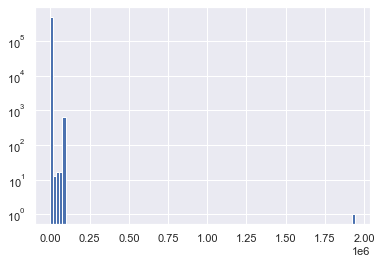

In [44]:
plt.hist(new_file.trip_duration,100)
plt.yscale('log')
plt.show()

In [45]:
new_file=new_file[new_file.trip_duration < 100000]

In [46]:
# # qwerty
mask = np.random.rand(len(new_file)) < 0.7

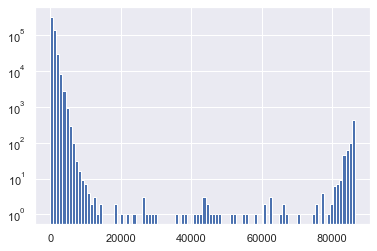

In [47]:
plt.hist(new_file.trip_duration,100)
plt.yscale('log')
plt.show()

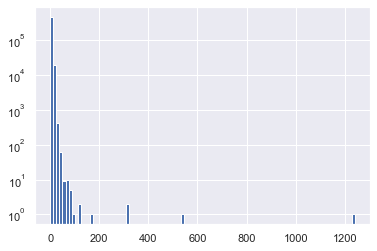

In [48]:
plt.hist(new_file.haversine,100)
plt.yscale('log')
plt.show()

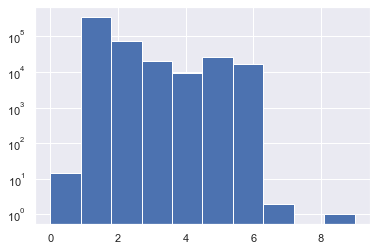

In [49]:
plt.hist(new_file.passenger_count,10)
plt.yscale('log')
plt.show()

C:\Users\1\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


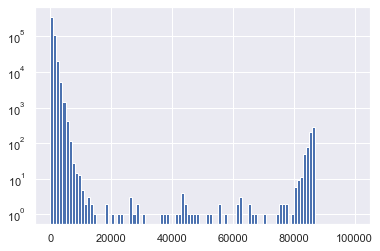

In [50]:
mt=new_file.from_Kennedy+new_file.to_Kennedy+new_file.from_Guardia+new_file.to_Guardia
plt.hist(new_file.trip_duration.loc[~mt],100,(0,100000))
plt.yscale('log')
plt.show()

In [51]:
(new_file.passenger_count>6).sum()
new_file.passenger_count[new_file.passenger_count>6]=0

new_file['airport_trip'] = new_file['from_Guardia'] | \
                new_file['from_Kennedy'] | new_file['to_Guardia'] | new_file['to_Kennedy']

In [52]:
del new_file['from_Guardia'] 
del new_file['from_Kennedy']  
del new_file['to_Guardia']  
del new_file['to_Kennedy']

In [53]:
new_file['traffic_jams']=new_file['with_traffic_jams']

In [54]:
del new_file['with_traffic_jams']

In [55]:
del  new_file['haversine']

In [56]:
categ_features=['anomalous','traffic_jams','airport_trip']
numeric_features = ['vendor_id','passenger_count','store_and_fwd_flag','month',
                        'weekday','hour','day','log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categ_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(new_file.loc[mask], new_file.loc[mask,'log_trip_duration'])
y_pred = model.predict(new_file.loc[~mask])

print("Test RMSLE = %.4f" % ((mean_squared_error(new_file.loc[~mask,'log_trip_duration'], \
                                                 y_pred)))**(1/2))

Test RMSLE = 0.5041


In [57]:
len(categ_features)+len(numeric_features)

11

In [58]:

from sklearn.linear_model import Lasso

numeric_features = categ_features=['anomalous','traffic_jams','airport_trip']
numeric_features = ['vendor_id','passenger_count','store_and_fwd_flag','month',
                        'weekday','hour','day','log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categ_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(new_file.loc[mask], new_file.loc[mask,'log_trip_duration'])
y_pred = model.predict(new_file.loc[~mask])

print("Test RMSLE = %.4f" % ((mean_squared_error(new_file.loc[~mask,'log_trip_duration'], \
                                                 y_pred)))**(1/2))

Test RMSLE = 0.7964


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

alphas = np.logspace(-4, -1, 10)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], 
                        scoring=rmse_scorer, cv=5)

m = np.random.rand(len(new_file)) < 0.2
searcher.fit(new_file.loc[m], 
             new_file.loc[m, 'log_trip_duration'])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe_and_scaling',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['anomalous',
                                                                          'traffic_jams',
                                                                          'airport_trip']),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         ['vendor_id',
                                                                          'passenger_count',
                                                                          'store_and_fwd_flag',
         

Best alpha = 0.0001


Text(0, 0.5, 'CV score')

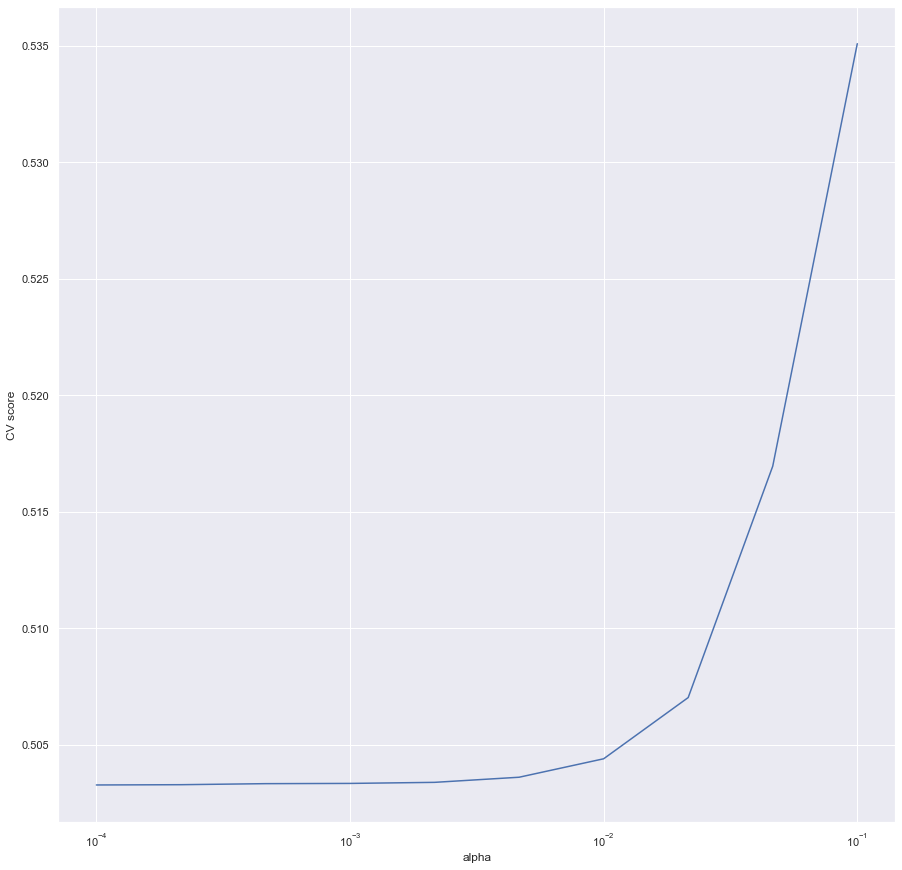

In [60]:
best_alpha = searcher.best_params_['regression__alpha']
print("Best alpha = %.4f" % best_alpha)
plt.figure(figsize=(15, 15))
plt.plot(alphas, -searcher.cv_results_['mean_test_score'])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [61]:
grid_pairs, counts = np.unique(np.array((new_file.grid_pickup,new_file.grid_dropoff)).T,
                               axis=0,return_counts=True)

grid_pairs=grid_pairs[counts.argsort()[::-1]]

In [62]:
all_p=np.array((new_file.grid_pickup,new_file.grid_dropoff)).T
gp=np.empty(len(new_file))
for i,l in enumerate(all_p):
    gp[i]= np.where(grid_pairs==l)[0][0]

In [63]:
gp_grid=[]
for i in gp:
    if i!=0:
        gp_grid.append(-1)
    else:
        gp_grid.append(int(i))

In [64]:
new_file['gp_grid']=gp_grid

In [65]:
from sklearn.linear_model import Lasso

numeric_features = categ_features=['anomalous','traffic_jams','airport_trip']
numeric_features = ['passenger_count','month','gp_grid','weekday','hour','log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categ_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])


model = pipeline.fit(new_file.loc[mask], new_file.loc[mask,'log_trip_duration'])
y_pred = model.predict(new_file.loc[~mask])


In [66]:
alphas = np.logspace(-4, -1, 10)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], 
                        scoring=rmse_scorer, cv=5)

n = np.random.rand(len(new_file)) < 0.2
searcher.fit(new_file.loc[n], 
             new_file.loc[n, 'log_trip_duration'])

b_alpha = searcher.best_params_['regression__alpha']
print("Best alpha = %.4f" % b_alpha)
print('RMSLE score:{}'.format(-searcher.cv_results_['mean_test_score']))

Best alpha = 0.0001
RMSLE score:[0.50023971 0.50025185 0.50030651 0.50033391 0.50038702 0.50063366
 0.50164428 0.50541059 0.51987348 0.53862395]


In [67]:
print("Test RMSLE = %.4f" % ((mean_squared_error(new_file.loc[~mask,'log_trip_duration'], \
                                                 y_pred)))**(1/2))

Test RMSLE = 0.4980
